In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import sys 
import numpy as np
from astropy.coordinates import AltAz
import astropy.units as u
sys.path.append('/Users/physarah/Development/astronavi-cs')
sys.path.append('/Users/physarah/Development/dayobs/scripts')
import adnav as adnav
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [24]:
summer_observations = pd.read_json('/Users/physarah/Desktop/LAB_BRDF.json',lines=True)
winter_observations = pd.read_json('/Users/physarah/Desktop/LAB_BRDF_winter_time22222.json',lines=True)

summer_observations = summer_observations[summer_observations['magnitude']< 12.5]
winter_observations = winter_observations[winter_observations['magnitude']< 12.5]

summer_observations_high = summer_observations[summer_observations['sat_altitude']> 30]
winter_observations_high = winter_observations[winter_observations['sat_altitude']> 30]

In [25]:
sun_alts = list(summer_observations_high['sun_altitude'])
sun_azes = list(summer_observations_high['sun_altitude'])
sat_alts = list(summer_observations_high['sat_altitude'])
sat_azes = list(summer_observations_high['sat_azimuth'])

sun_seps_summer = []
for i in np.arange(0,len(summer_observations_high['sun_altitude'])):
    sun_separation = adnav.angle_between_degrees(AltAz(alt = sun_alts[i]*u.deg, 
                                                       az = sun_azes[i]*u.deg,), 
                                                 AltAz(alt = sat_alts[i]*u.deg,
                                                       az = sat_azes[i]*u.deg,))
    sun_seps_summer.append(sun_separation.value)

In [29]:
sun_alts = list(winter_observations_high['sun_altitude'])
sun_azes = list(winter_observations_high['sun_altitude'])
sat_alts = list(winter_observations_high['sat_altitude'])
sat_azes = list(winter_observations_high['sat_azimuth'])

sun_seps_winter = []
for i in np.arange(0,len(winter_observations_high['sun_altitude'])):
    sun_separation = adnav.angle_between_degrees(AltAz(alt = sun_alts[i]*u.deg, 
                                                       az = sun_azes[i]*u.deg,), 
                                                 AltAz(alt = sat_alts[i]*u.deg,
                                                       az = sat_azes[i]*u.deg,))
    sun_seps_winter.append(sun_separation.value)

In [30]:
summer_observations_high['sun_sep'] = sun_seps_summer
winter_observations_high['sun_sep'] = sun_seps_winter

/anaconda3/envs/earthwatch/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/earthwatch/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Local Time')

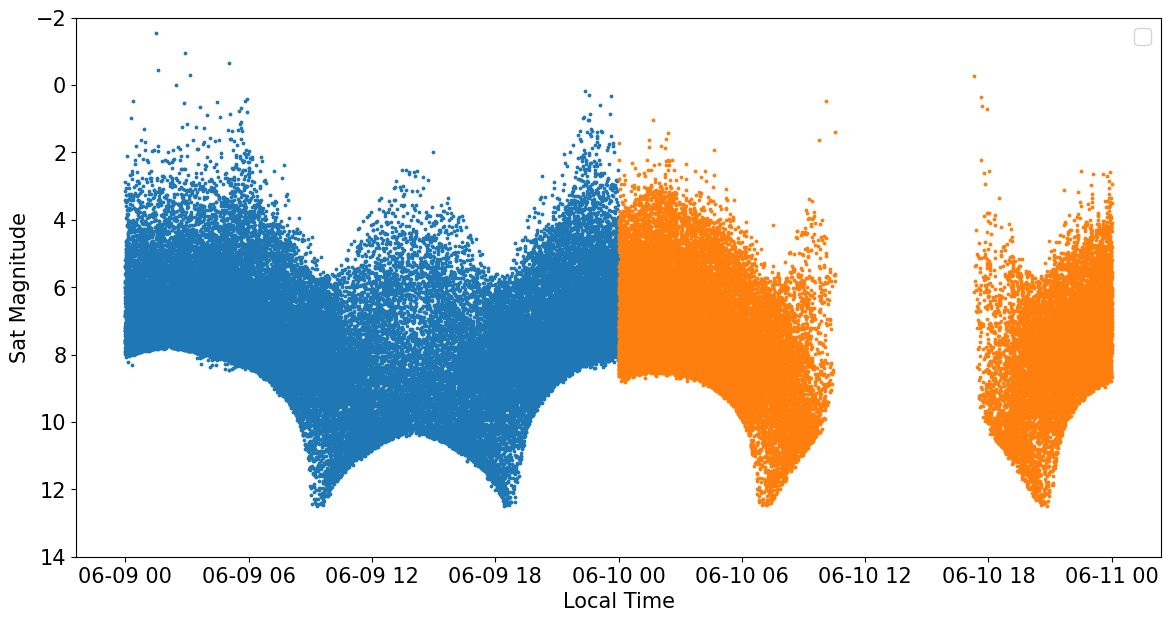

In [186]:
plt.figure(figsize=(14,7))
plt.scatter(y=summer_observations['magnitude'], x=pd.to_datetime(summer_observations['times']) + timedelta(hours = 24*5*30 + 24), s = 3)
plt.scatter(y=winter_observations['magnitude'], x=pd.to_datetime(winter_observations['times']) + timedelta(hours = 0), s = 3)

# plt.axvline(datetime(year = 2024, month = 6, day = 10, hour = 20, minute=10), color = 'black')
# plt.axvline(datetime(year = 2024, month = 6, day = 11, hour = 5, minute=55), color = 'black', label = 'Sun Set')
# plt.axvline(datetime(year = 2024, month = 6, day = 11, hour = 3, minute=55), color = 'blue')
# plt.axvline(datetime(year = 2024, month = 6, day = 10, hour = 22, minute=55), color = 'blue', label = 'Twilight')
# plt.xlim(datetime(year = 2024, month = 6, day = 10, hour = 10, minute=30),
#         datetime(year = 2024, month = 6, day = 11, hour = 12, minute=0))
plt.legend()
plt.ylim(14,-2)
plt.ylabel("Sat Magnitude")
plt.xlabel("Local Time")

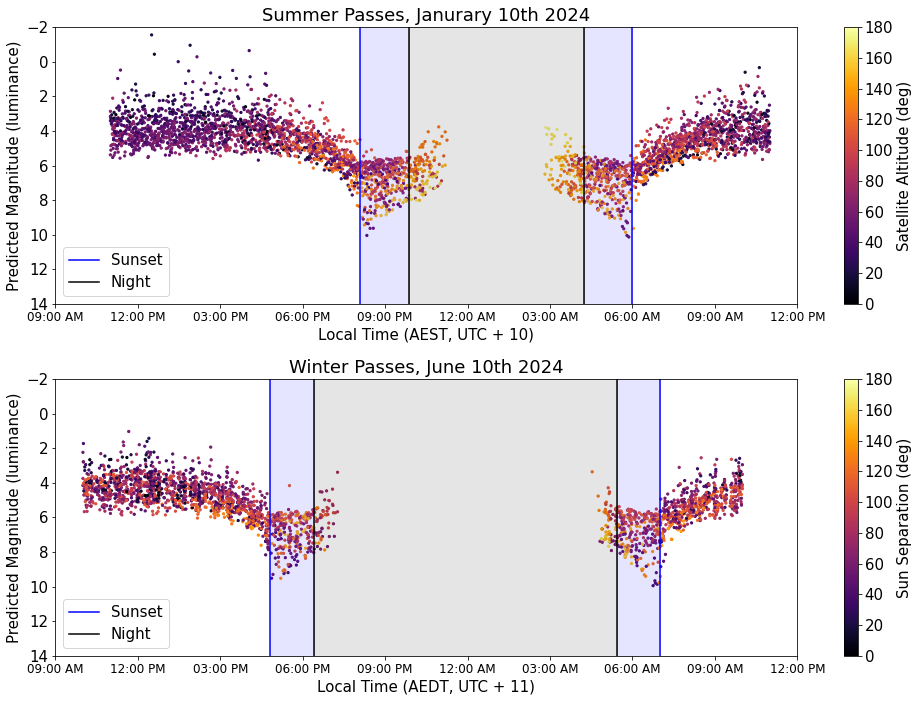

In [33]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 15})


plt.figure(figsize = (14,10))
# Create the first subplot (upper panel)
plt.subplot(2, 1, 1)
plt.scatter(y=summer_observations_high['magnitude'], x=pd.to_datetime(summer_observations_high['times']) + timedelta(hours = 11), 
            s = 5, 
            c = summer_observations_high['sun_sep'],
           cmap = 'inferno')
plt.axvline(datetime(year = 2024, month = 1, day = 10, hour = 10, minute=52)+ timedelta(hours = 11), color = 'black')
plt.axvline(datetime(year = 2024, month = 1, day = 10, hour = 9, minute=6)+ timedelta(hours = 11), color = 'blue')
plt.axvline(datetime(year = 2024, month = 1, day = 10, hour = 19, minute=0)+ timedelta(hours = 11), color = 'blue',
           label = "Sunset")
plt.axvline(datetime(year = 2024, month = 1, day = 10, hour = 17, minute=14)+ timedelta(hours = 11), color = 'black',
           label = "Night")

plt.axvspan(datetime(year = 2024, month = 1, day = 10, hour = 10, minute=52)+ timedelta(hours = 11), 
            datetime(year = 2024, month = 1, day = 10, hour = 9, minute=6)+ timedelta(hours = 11), 
            alpha=0.1, color='blue')

plt.axvspan(datetime(year = 2024, month = 1, day = 10, hour = 17, minute=14)+ timedelta(hours = 11), 
            datetime(year = 2024, month = 1, day = 10, hour = 10, minute=52)+ timedelta(hours = 11), 
            alpha=0.1, color='black')

plt.axvspan(datetime(year = 2024, month = 1, day = 10, hour = 17, minute=14)+ timedelta(hours = 11), 
            datetime(year = 2024, month = 1, day = 10, hour = 19, minute=0)+ timedelta(hours = 11), 
            alpha=0.1, color='blue')

plt.colorbar(label = "Satellite Altitude (deg)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%I:%M %p'))
plt.xlabel("Local Time (AEST, UTC + 10)")
plt.xticks(fontsize = 12)
plt.ylabel("Predicted Magnitude (luminance)")
plt.title("Summer Passes, Janurary 10th 2024")
plt.xlim(datetime(year = 2024, month = 1, day = 10, hour = 9),datetime(year = 2024, month = 1, day = 11, hour = 12))
plt.ylim(14, -2)
plt.clim(0,180)
plt.legend()

# Create the second subplot (lower panel)
plt.subplot(2, 1, 2)
plt.scatter(y=winter_observations_high['magnitude'], x=pd.to_datetime(winter_observations_high['times']) + timedelta(hours = 10), 
            s = 5, 
            c = winter_observations_high['sun_sep'],
           cmap = 'inferno')
plt.axvline(datetime(year = 2024, month = 6, day = 10, hour = 6, minute=49)+ timedelta(hours = 10), 
            color = 'blue',
            label = "Sunset")
plt.axvline(datetime(year = 2024, month = 6, day = 10, hour = 19, minute=26)+ timedelta(hours = 10), 
            color = 'black',
           label = "Night")
plt.axvline(datetime(year = 2024, month = 6, day = 10, hour = 8, minute=24)+ timedelta(hours = 10), 
            color = 'black')
plt.axvline(datetime(year = 2024, month = 6, day = 10, hour = 21, minute=1)+ timedelta(hours = 10), 
            color = 'blue')

plt.axvspan(datetime(year = 2024, month = 6, day = 10, hour = 6, minute=49)+ timedelta(hours = 10), 
            datetime(year = 2024, month = 6, day = 10, hour = 8, minute=24)+ timedelta(hours = 10), 
            alpha=0.1, color='blue')

plt.axvspan(datetime(year = 2024, month = 6, day = 10, hour = 8, minute=24)+ timedelta(hours = 10), 
            datetime(year = 2024, month = 6, day = 10, hour = 19, minute=26)+ timedelta(hours = 10), 
            alpha=0.1, color='black')

plt.axvspan(datetime(year = 2024, month = 6, day = 10, hour = 19, minute=26)+ timedelta(hours = 10), 
            datetime(year = 2024, month = 6, day = 10, hour = 21, minute=1)+ timedelta(hours = 10), 
            alpha=0.1, color='blue')

plt.title("Winter Passes, June 10th 2024")
plt.colorbar(label = "Sun Separation (deg)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%I:%M %p'))
plt.xlabel("Local Time (AEDT, UTC + 11)")
plt.xticks(fontsize = 12)
plt.ylabel("Predicted Magnitude (luminance)")

plt.ylim(14, -2)
plt.xlim(datetime(year = 2024, month = 6, day = 10, hour = 9),datetime(year = 2024, month = 6, day = 11, hour = 12))

plt.clim(0,180)
plt.legend(loc = "lower left")
# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.savefig('/Users/physarah/Desktop/figure_1_sat_passes_version2.png')

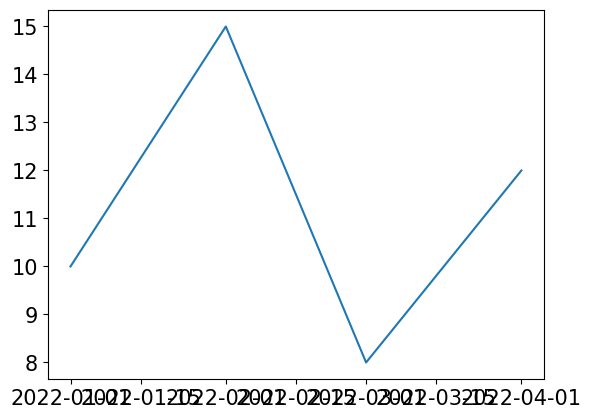

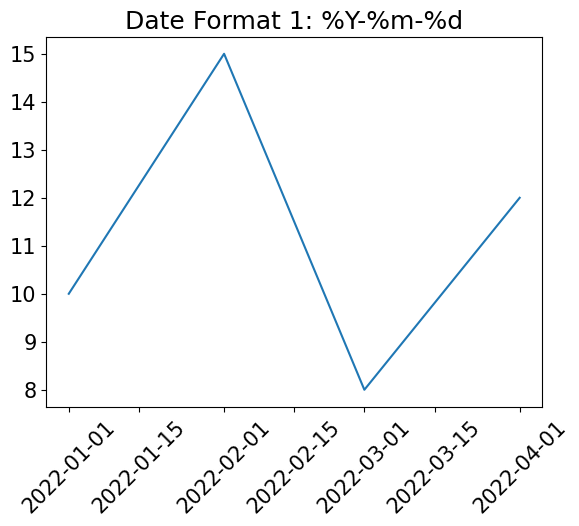

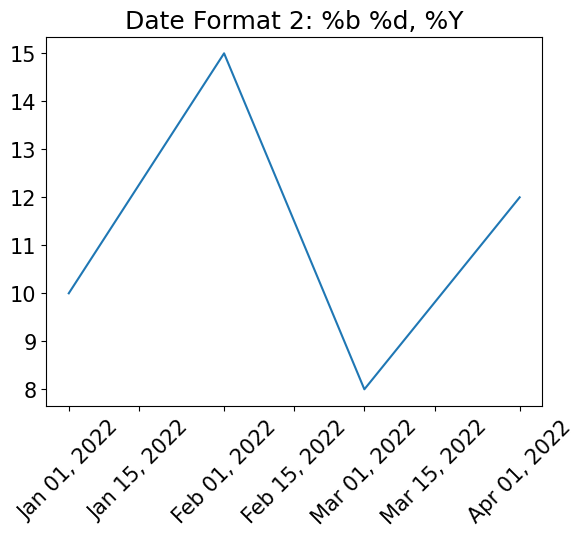

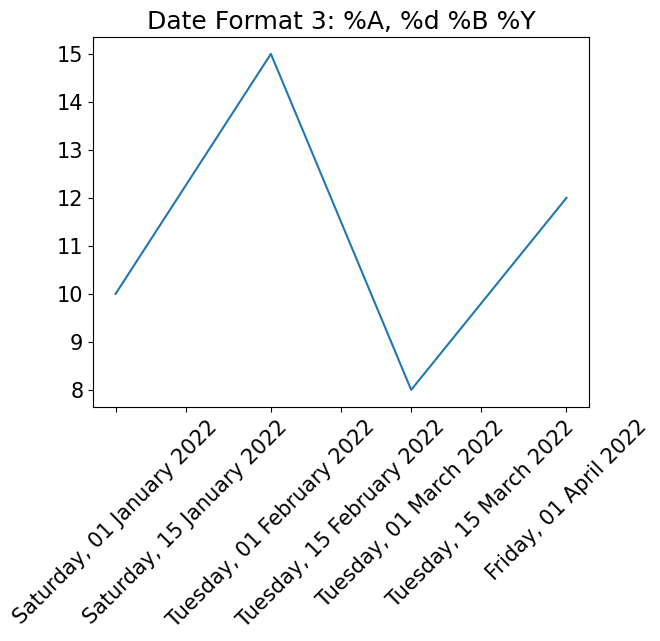

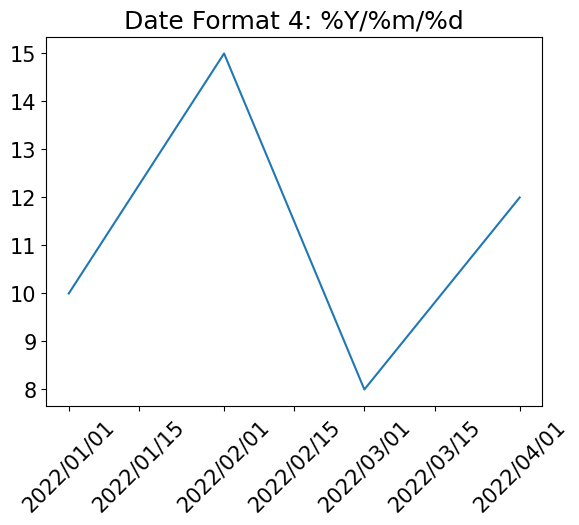

In [188]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Sample data
dates = [datetime(2022, 1, 1), datetime(2022, 2, 1), datetime(2022, 3, 1), datetime(2022, 4, 1)]
values = [10, 15, 8, 12]

# Create a plot
plt.plot(dates, values)

# Configure x-axis with different date formats
date_format_strings = ['%Y-%m-%d', '%b %d, %Y', '%A, %d %B %Y', '%Y/%m/%d']

for i, date_format in enumerate(date_format_strings, 1):
    plt.figure()
    plt.plot(dates, values)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(date_format))
    plt.title(f"Date Format {i}: {date_format}")
    plt.xticks(rotation=45)

plt.show()

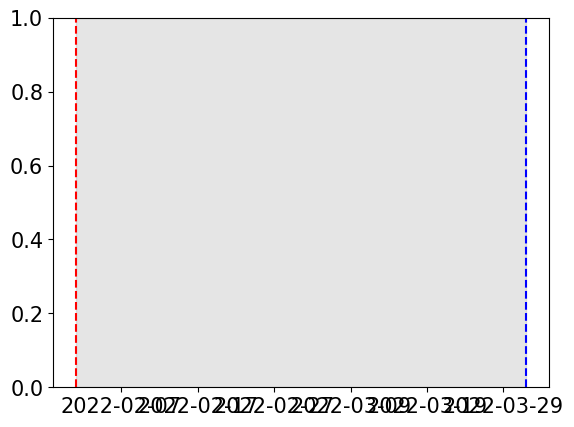

In [189]:
date_numbers = mdates.date2num(dates)


# Add vertical lines (axvline)
plt.axvline(x=date_numbers[1], color='red', linestyle='--', label='Vertical Line 1')
plt.axvline(x=date_numbers[3], color='blue', linestyle='--', label='Vertical Line 2')

# Shade the regions between the vertical lines
plt.axvspan(date_numbers[1], date_numbers[3], alpha=0.2, color='gray', label='Shaded Region')

# Configure x-axis to display dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


(array([5.0000e+00, 2.9000e+01, 2.0100e+02, 1.1440e+03, 4.3500e+03,
        1.2329e+04, 2.1412e+04, 8.9030e+03, 4.0080e+03, 7.0500e+02]),
 array([-1.55421153, -0.15076564,  1.25268026,  2.65612615,  4.05957205,
         5.46301794,  6.86646383,  8.26990973,  9.67335562, 11.07680151,
        12.48024741]),
 <BarContainer object of 10 artists>)

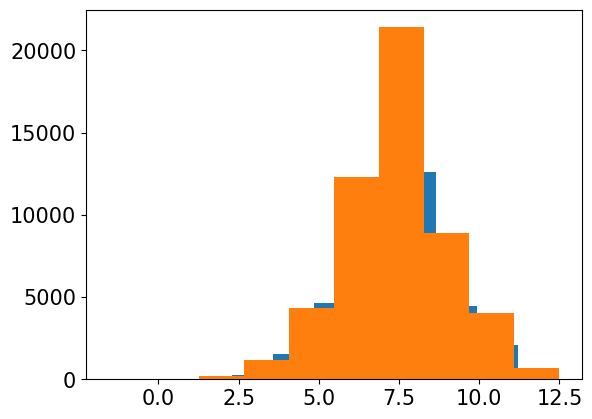

In [190]:
plt.hist(winter_observations['magnitude'])
plt.hist(summer_observations['magnitude'])

(array([  2.,   8.,  10., 157., 177., 142., 108.,  43.,  24.,  11.]),
 array([3.36277236, 4.02100938, 4.67924641, 5.33748344, 5.99572046,
        6.65395749, 7.31219452, 7.97043154, 8.62866857, 9.28690559,
        9.94514262]),
 <a list of 10 Patch objects>)

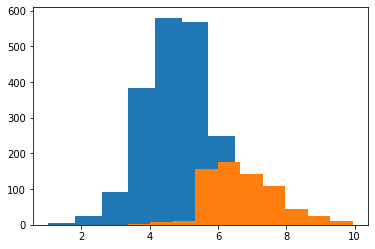

In [131]:
winter_day = winter_observations_high[winter_observations_high['sun_altitude']>0]
winter_night = winter_observations_high[winter_observations_high['sun_altitude']<=0]
plt.hist(winter_day['magnitude'])
plt.hist(winter_night['magnitude'])

74.41797509474824
25.58202490525176
74.30293896006029
25.69706103993971


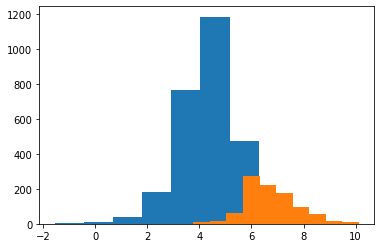

In [132]:
summer_day = summer_observations_high[summer_observations_high['sun_altitude']>0]
summer_night = summer_observations_high[summer_observations_high['sun_altitude']<=0]
plt.hist(summer_day['magnitude'])
plt.hist(summer_night['magnitude'])

print(len(summer_day['magnitude'])/len(summer_observations_high['magnitude']) * 100)
print(len(summer_night['magnitude'])/len(summer_observations_high['magnitude']) * 100)


print(len(winter_day['magnitude'])/len(winter_observations_high['magnitude']) * 100)
print(len(winter_night['magnitude'])/len(winter_observations_high['magnitude']) * 100)




In [193]:
print(np.median(summer_day['magnitude'])/np.median(summer_night['magnitude']))
print(np.median(winter_day['magnitude'])/np.median(winter_night['magnitude']))


0.6649977759577842
0.729993991944676


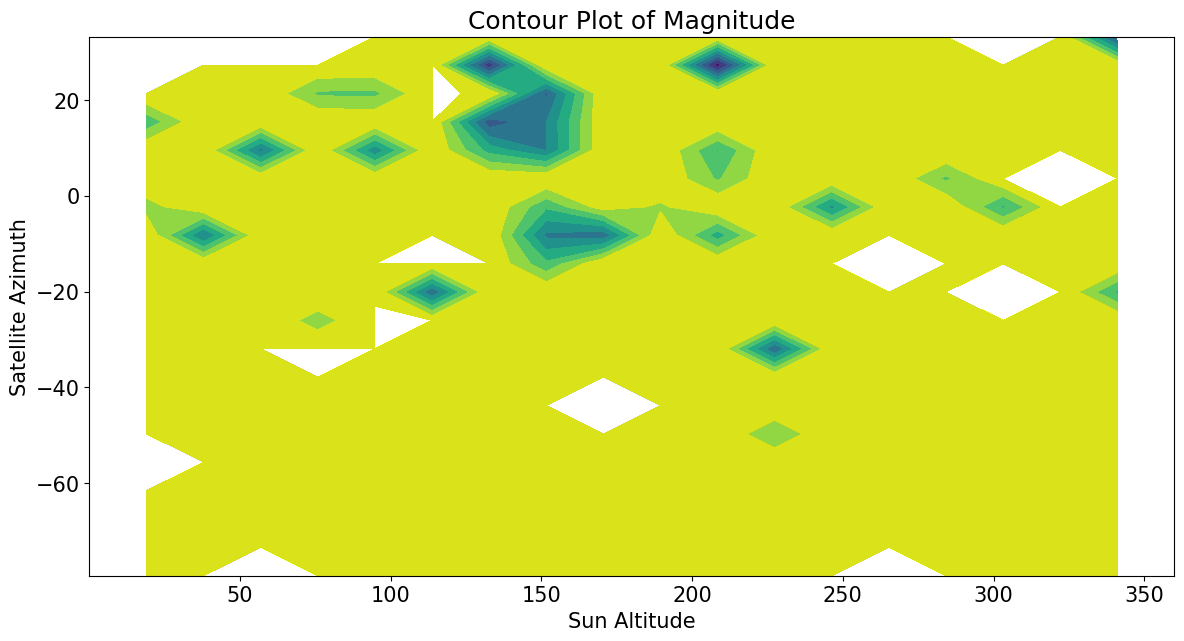

In [194]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# Assuming outs is a DataFrame with columns 'sun_altitude', 'sat_azimuth', and 'magnitude'
y = outs['sun_altitude']
x = outs['sat_azimuth']
z = outs['magnitude']

# Define a regular grid
xi = np.linspace(x.min(), x.max(), 20)
yi = np.linspace(y.min(), y.max(), 20)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the data onto the regular grid
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot the filled contour map
plt.figure(figsize=(14, 7))
contour_filled = plt.contourf(xi, yi, zi, levels=10, cmap='viridis')


# Adding a colorbar
cbar = plt.colorbar(contour, label='Magnitude')

# Adding labels and title
plt.xlabel('Sun Altitude')
plt.ylabel('Satellite Azimuth')
plt.title('Contour Plot of Magnitude')

# Show the plot
plt.show()

In [195]:
#dark = outs[outs['sun_altitude']<-18]
day = outs2[outs2['sun_altitude']>0]
civil = outs2[(outs2['sun_altitude']<0) & (outs2['sun_altitude']>-6)]
nautical = outs2[(outs2['sun_altitude']<-6) & (outs2['sun_altitude']>-12)]
astro = outs2[(outs2['sun_altitude']<-6) & (outs2['sun_altitude']>-12)]
night = outs2[(outs2['sun_altitude']<-12)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Local Time')

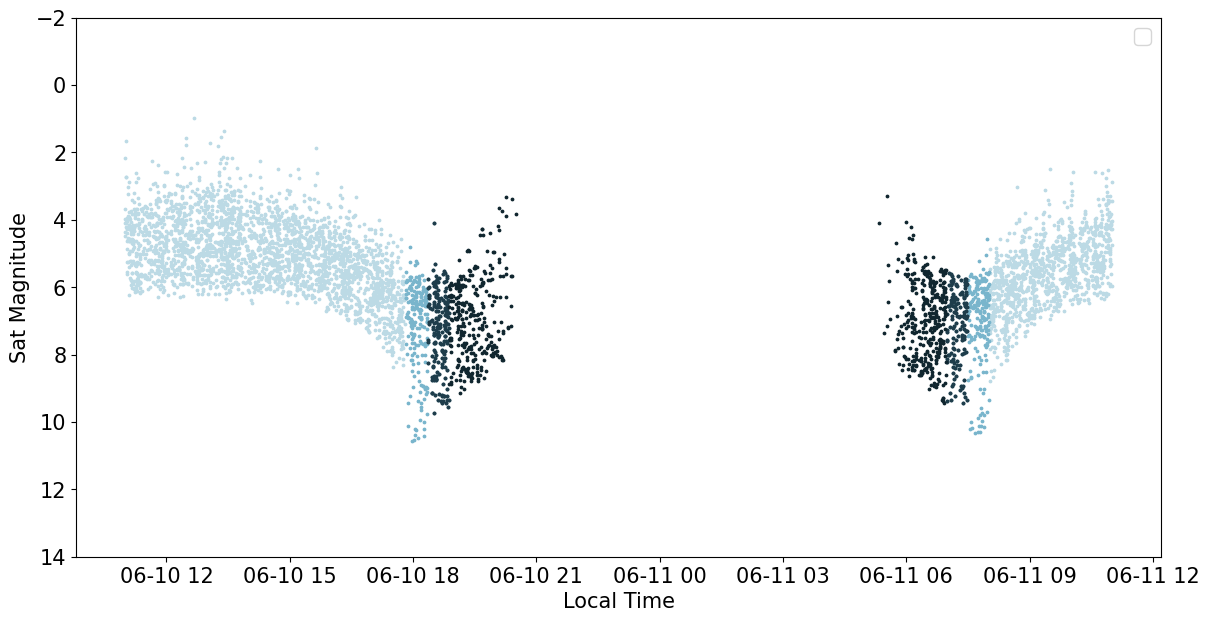

In [196]:
plt.figure(figsize=(14,7))
plt.scatter(y=day['magnitude'], x=pd.to_datetime(day['times']) + timedelta(hours = 11), s = 3, color = '#BCDAE5')
plt.scatter(y=civil['magnitude'], x=pd.to_datetime(civil['times']) + timedelta(hours = 11), s = 3, color = '#79B5CC')
plt.scatter(y=nautical['magnitude'], x=pd.to_datetime(nautical['times']) + timedelta(hours = 11), s = 3, color = '#3C6475')
plt.scatter(y=astro['magnitude'], x=pd.to_datetime(astro['times']) + timedelta(hours = 11), s = 3, color = '#1E3D4B')
plt.scatter(y=night['magnitude'], x=pd.to_datetime(night['times']) + timedelta(hours = 11), s = 3, color = '#10262F')

plt.legend()
plt.ylim(14,-2)
plt.ylabel("Sat Magnitude")
plt.xlabel("Local Time")

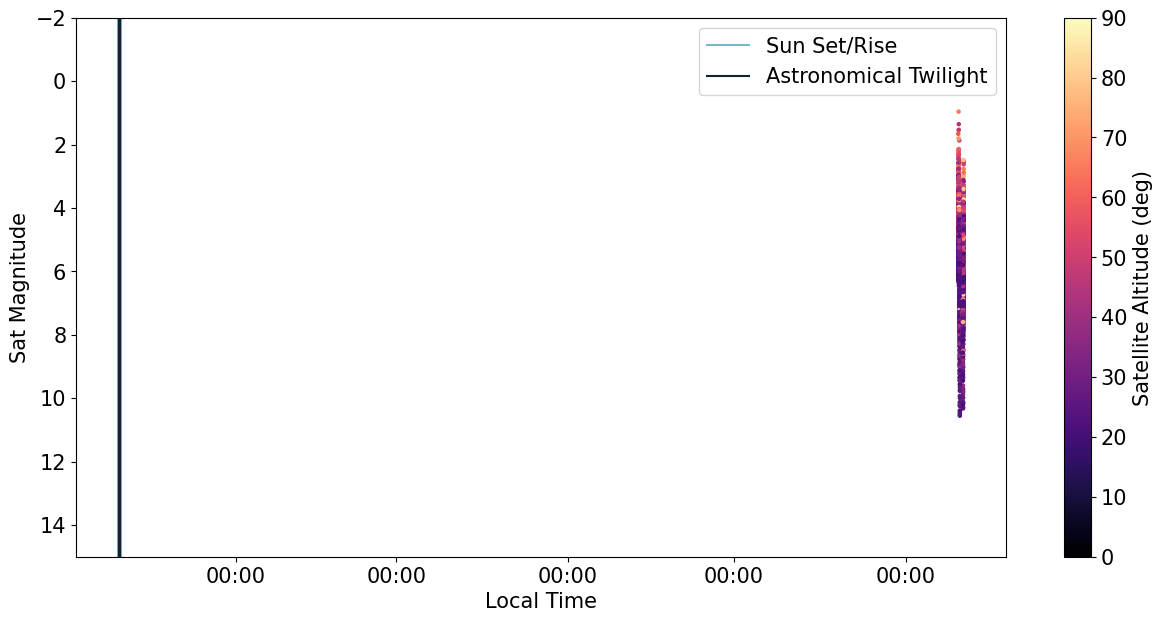

In [197]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.dates import DateFormatter, DayLocator
import matplotlib.dates as mdates
from datetime import datetime


color5 = '#BCDAE5'  
color4 = '#79B5CC'  
color3 = '#3C6475'  
color2 = '#1E3D4B'
color1 = '#10262F'

colors = [color1, color2, color3, color4, color5, color5]
custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', colors)


outs2 = outs[outs['magnitude']!=12.5]
outs2 = outs2[outs['sat_altitude']>20]

plt.figure(figsize=(15,7))
plt.scatter(y=outs2['magnitude'], x=pd.to_datetime(outs2['times']) + timedelta(hours = 11), s = 5, 
            c = outs2['sat_altitude'], cmap = 'magma')
plt.axvline(datetime(year = 2024, month = 1, day = 10, hour = 20, minute=10), color = '#79B5CC' )
plt.axvline(datetime(year = 2024, month = 1, day = 11, hour = 5, minute=55), color = '#79B5CC' , label = 'Sun Set/Rise')
plt.axvline(datetime(year = 2024, month = 1, day = 11, hour = 3, minute=55), color = '#10262F')
plt.axvline(datetime(year = 2024, month = 1, day = 10, hour = 22, minute=10), color = '#10262F', label = 'Astronomical Twilight')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Adjust the format as needed
 


plt.colorbar(label = "Satellite Altitude (deg)")
plt.clim(0,90)
plt.legend()
plt.ylim(15,-2)
plt.ylabel("Sat Magnitude")
plt.xlabel("Local Time")
plt.savefig("/Users/physarah/Desktop/update_fig3.png")

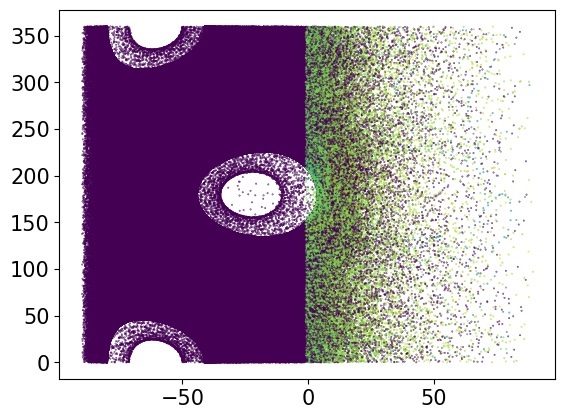

In [198]:
plt.scatter(outs['sat_altitude'], outs['sat_azimuth'], s = 0.1, c = -outs['magnitude'])

(14.0, -2.0)

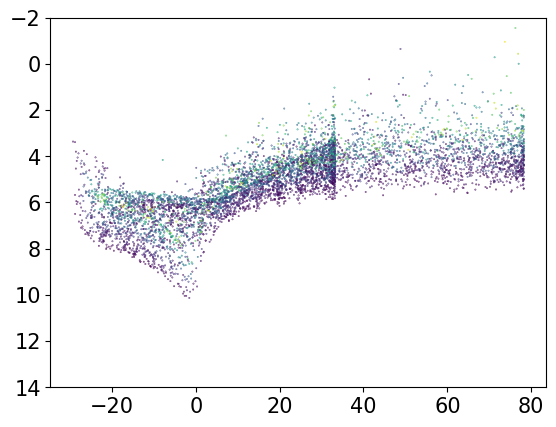

In [199]:
plt.scatter(winter_observations_high['sun_altitude'],
            winter_observations_high['magnitude'], s = 0.1, 
            c = winter_observations_high['sat_altitude'])
plt.scatter(summer_observations_high['sun_altitude'], 
            summer_observations_high['magnitude'], s = 0.1, 
            c = summer_observations_high['sat_altitude'])
plt.ylim(14,-2)

In [201]:
len(winter_observations_high[winter_observations_high['sun_altitude']<=0])

682

In [202]:
len(winter_observations_high[winter_observations_high['sun_altitude']>0])

1972

In [211]:
test_winter_day = list(winter_observations_high[winter_observations_high['sun_altitude']>0]['cat_name'])
test_winter_night = list(winter_observations_high[winter_observations_high['sun_altitude']<=0]['cat_name'])


In [218]:
test_summer_day = list(summer_observations_high[summer_observations_high['sun_altitude']>0]['cat_name'])
test_summer_night = list(summer_observations_high[summer_observations_high['sun_altitude']<=0]['cat_name'])

In [213]:
# Find unique values in list1 compared to list2
unique_to_list1 = set(test_winter_day) - set(test_winter_night)

# Find unique values in list2 compared to list1
unique_to_list2 = set(test_winter_night) - set(test_winter_day)

# Count the number of unique values
num_unique_to_list1 = len(unique_to_list1)
num_unique_to_list2 = len(unique_to_list2)

In [214]:
num_unique_to_list1

434

In [215]:
num_unique_to_list2

122

In [235]:
len((list(summer_observations_high['cat_name'])))

3694

In [236]:
# Find unique values in list1 compared to list2
unique_to_list1 = set(test_summer_day) - set(test_summer_night)

# Find unique values in list2 compared to list1
unique_to_list2 = set(test_summer_night) - set(test_summer_day)

# Count the number of unique values
num_unique_to_list1 = len(unique_to_list1)
num_unique_to_list2 = len(unique_to_list2)

In [238]:
num_unique_to_list2

70

In [240]:
len(test_summer_night)

945

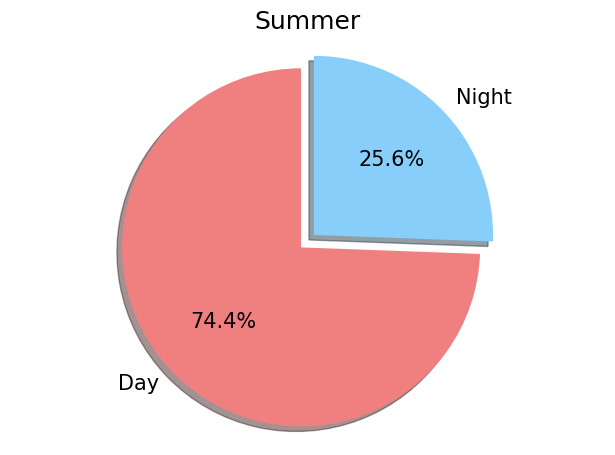

In [257]:
import matplotlib.pyplot as plt

# Sample data
labels = ['Day', 'Night']
sizes = [2749/3694, 945/3694]

# Colors for each category
colors = ['lightcoral', 'lightskyblue'] #'lightgreen', 'gold']

# Exploding a slice (optional)
explode = (0.1, 0)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title("Summer")
plt.tight_layout()
# Display the pie chart
plt.show()

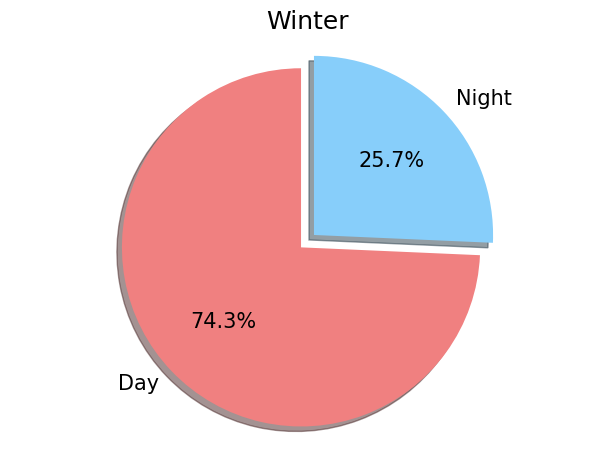

In [250]:
import matplotlib.pyplot as plt

# Sample data
labels = ['Day', 'Night']
sizes = [1972/2654, 682/2654]

# Colors for each category
colors = ['lightcoral', 'lightskyblue'] #'lightgreen', 'gold']

# Exploding a slice (optional)
explode = (0.1, 0)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title("Winter")
plt.tight_layout()
# Display the pie chart
plt.show()

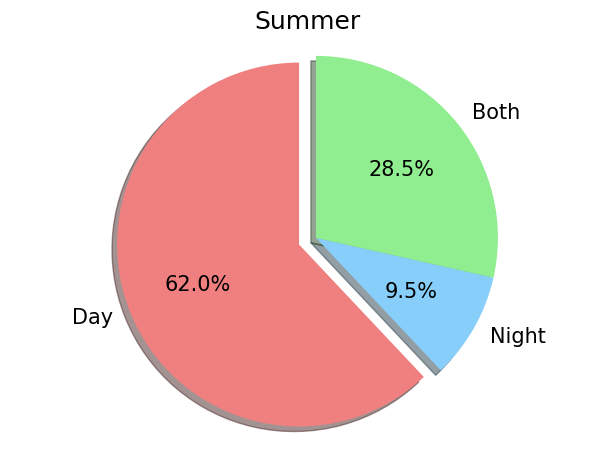

In [251]:
import matplotlib.pyplot as plt

# Sample data
labels = ['Day', 'Night', 'Both']
sizes = [459/740, 70/740, (740-(459+70))/740]

# Colors for each category
colors = ['lightcoral', 'lightskyblue', 'lightgreen']#, 'gold']

# Exploding a slice (optional)
explode = (0.1, 0, 0)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title("Summer")
plt.tight_layout()
# Display the pie chart
plt.show()

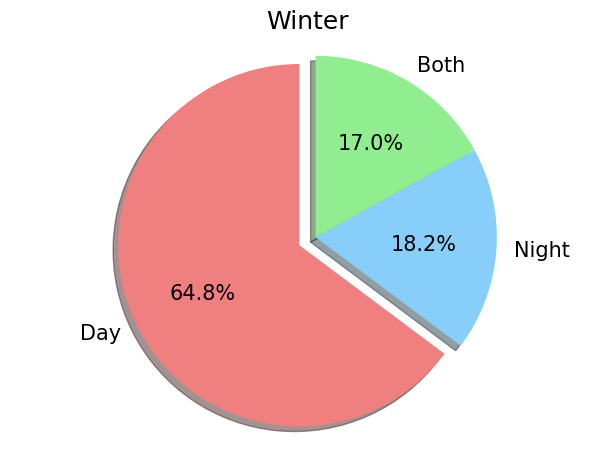

In [252]:
import matplotlib.pyplot as plt

# Sample data
labels = ['Day', 'Night', 'Both']
sizes = [434/670, 122/670, (670-(434+122))/670]

# Colors for each category
colors = ['lightcoral', 'lightskyblue', 'lightgreen']#, 'gold']

# Exploding a slice (optional)
explode = (0.1, 0, 0)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title("Winter")
plt.tight_layout()
# Display the pie chart
plt.show()

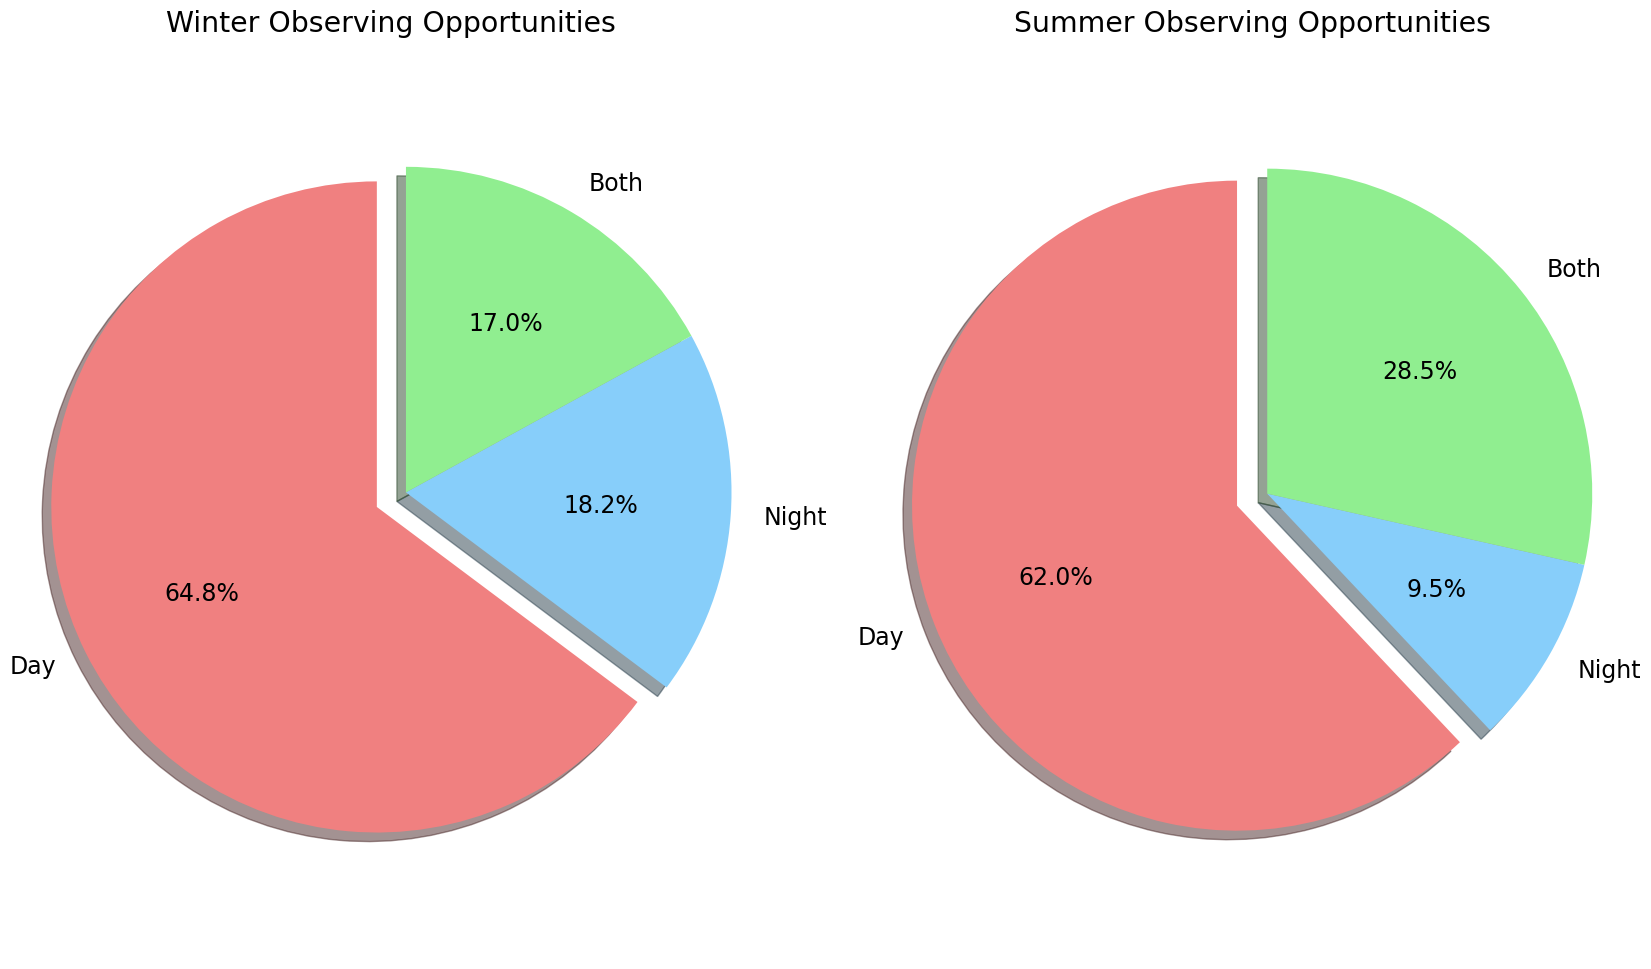

In [274]:
plt.figure(figsize = (17,10))

plt.rcParams.update({'font.size': 17})


# Create the first subplot (upper panel)
plt.subplot(1, 2, 1)

labels = ['Day', 'Night', 'Both']
sizes = [434/670, 122/670, (670-(434+122))/670]
colors = ['lightcoral', 'lightskyblue', 'lightgreen']#, 'gold']
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Winter Observing Opportunities")

# Create the second subplot (lower panel)
plt.subplot(1, 2, 2)

labels = ['Day', 'Night', 'Both']
sizes = [459/740, 70/740, (740-(459+70))/740]
colors = ['lightcoral', 'lightskyblue', 'lightgreen']#, 'gold']
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Summer Observing Opportunities")
#plt.suptitle("Fraction of Observable Satellites (above 30 degrees) at Different Times")

plt.tight_layout()
plt.savefig("/Users/physarah/Desktop/figure_2_sat_opps.png")

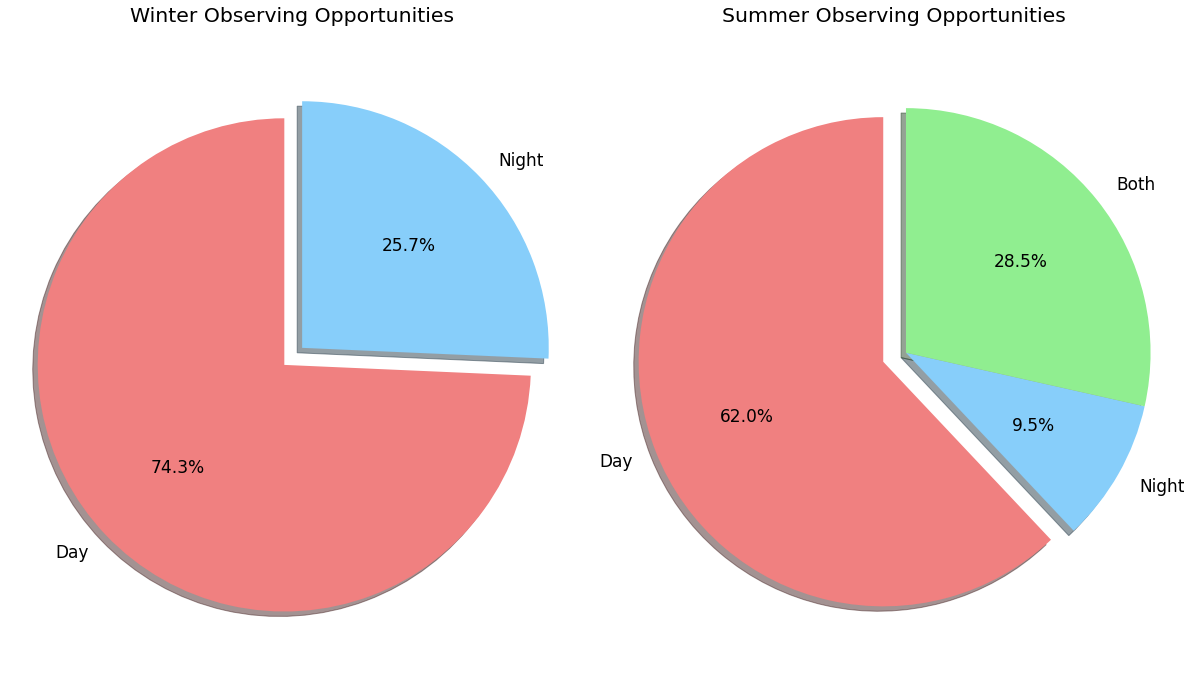

In [104]:
plt.figure(figsize = (17,10))

plt.rcParams.update({'font.size': 17})


# Create the first subplot (upper panel)
plt.subplot(1, 2, 1)

labels = ['Day', 'Night']
sizes = [1972/2654, 682/2654]
colors = ['lightcoral', 'lightskyblue']#, 'gold']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Winter Observing Opportunities")

# Create the second subplot (lower panel)
plt.subplot(1, 2, 2)

labels = ['Day', 'Night', 'Both']
sizes = [459/740, 70/740, (740-(459+70))/740]
colors = ['lightcoral', 'lightskyblue', 'lightgreen']#, 'gold']
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Summer Observing Opportunities")
#plt.suptitle("Fraction of Observable Satellites (above 30 degrees) at Different Times")

plt.tight_layout()
plt.savefig("/Users/physarah/Desktop/figure_4_sat_opps.png")

In [9]:
rband_data = pd.read_csv("/Users/physarah/Desktop/r_band_sky_plot.csv")

In [10]:
gband_data = pd.read_csv("/Users/physarah/Desktop/g_band_sky_plot.csv")

In [11]:
rband_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'exposure_set_id',
       'ind_exposure_id', 'file_path', 'target_name', 'startx', 'starty',
       'cmos_temp', 'exposure_time', 'gain', 'fwhm', 'fwhm2', 'datetime',
       'filter_name', 'object_altitude', 'object_azimuth', 'object_ra',
       'object_dec', 'sun_alt', 'sun_az', 'sun_separation', 'airmass',
       'roundness1', 'roundness2', 'sharpness', 'xcentroid', 'ycentroid',
       'aperture_mean', 'aperture_median', 'aperture_sum', 'aperture_rate',
       'target_mean', 'target_median', 'target_sum', 'target_rate', 'sky_mean',
       'sky_median', 'sky_sum', 'sky_rate', 'sc_area', 'bk_area', 'tod',
       'V_mag', 'B_mag', 'J_mag', 'R_mag', 'K_mag', 'U_mag', 'sloan_g',
       'sloan_r', 'm_inst', 'm_inst_sky', 'huntsman_mag_r',
       'huntsman_mag_r_sky'],
      dtype='object')

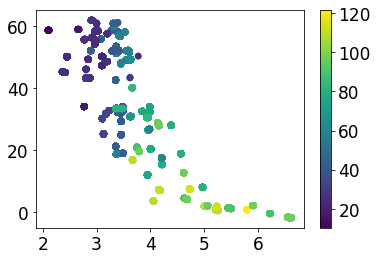

In [12]:
plt.scatter(gband_data['huntsman_mag_g_sky'], gband_data['sun_alt'], c = gband_data['sun_separation'])
plt.colorbar()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from random import sample 

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# Assuming X, Y, and Z are the columns you want to use
gband_data.dropna

data = gband_data.sample(100)
X = data['sun_alt'].to_list() +  other_sky_data['-32.45500847074031'].to_list()
y = data['huntsman_mag_g_sky'].to_list() + other_sky_data[' 19.915842441632975'].to_list()

test_df = pd.DataFrame({'sun_altitude':X, 'mags':y})
test_df

,sun_altitude,mags
0,0.743087,5.794930
1,7.082215,4.170867
2,0.626732,5.237300
3,34.070818,2.769858
4,18.870407,4.565965
...,...,...
219,-6.879025,10.950789
220,-6.776608,12.545352
221,-6.600037,12.162109
222,-6.434955,11.402468


In [14]:
X = test_df[['sun_altitude']]
y = test_df['mags']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
y_pred = model.predict(X_test)


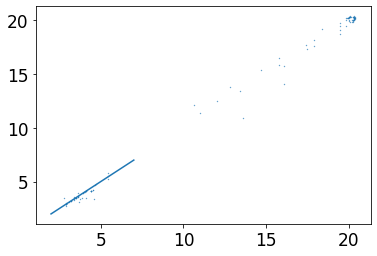

In [16]:
fig = plt.figure() 
plt.scatter(y_pred, y_test, s = 0.1)
plt.plot(np.arange(2,7,0.001),np.arange(2,7,0.001))
plt.show()

In [38]:
X = summer_observations_high[['sun_altitude']]
y_pred = model.predict(X)
summer_observations_high['sky_background'] = y_pred

In [40]:
X = winter_observations_high[['sun_altitude']]
y_pred = model.predict(X)
winter_observations_high['sky_background'] = y_pred

/anaconda3/envs/earthwatch/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


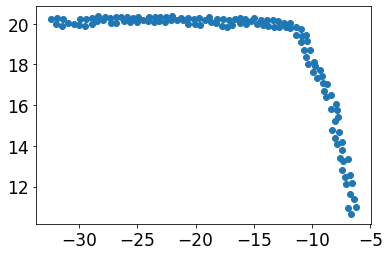

In [19]:
other_sky_data = pd.read_csv("/Users/physarah/Downloads/Default Dataset (11).csv")
plt.scatter(other_sky_data['-32.45500847074031'], other_sky_data[' 19.915842441632975'])

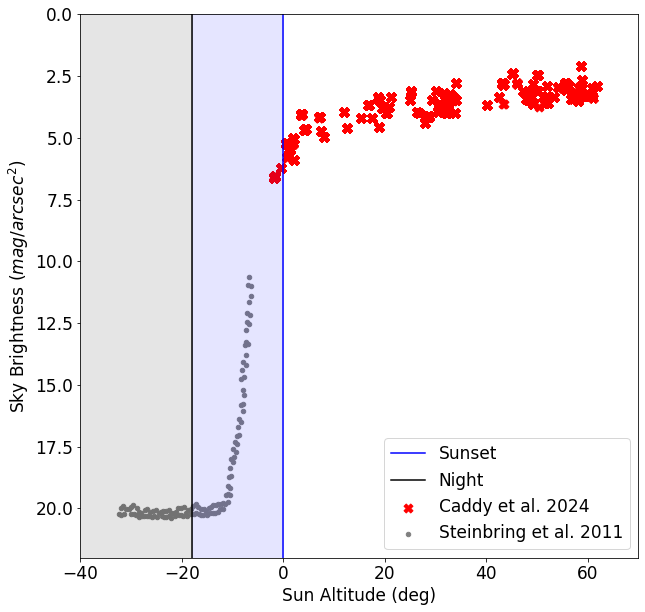

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 17})

new_data = pd.read_csv("/Users/physarah/Downloads/Default Dataset (12).csv")
new_data.columns = ['x','y']
new_data = new_data.sort_values(by = 'x', ascending = 'true')
new_data = new_data.astype('str')
new_data = new_data.drop_duplicates
new_data

# x = new_data['x'].to_list()
# y = new_data['y'].to_list()

#plt.plot(y,x)

# Create a cubic spline interpolation
#spline = CubicSpline(x, y)

# # Generate points for the spline curve
# x_spline = np.linspace(min(x), max(x), 100)
# y_spline = spline(x_spline)

# plt.scatter(y = np.polyval(poly, x), x = x, label='fit')

# Create the first subplot (upper panel)
#plt.scatter(summer_observations_high['sun_altitude'],
#            summer_observations_high['sky_background'], label = "Summer Satelites")

#plt.scatter(winter_observations_high['sun_altitude'],
#            winter_observations_high['sky_background'], label = "Winter Satelites")

plt.scatter(gband_data['sun_alt'],
            gband_data['huntsman_mag_g_sky'], label = "Caddy et al. 2024", marker = 'X', s = 80, color = 'red')
plt.scatter(other_sky_data['-32.45500847074031'], other_sky_data[' 19.915842441632975'], label = "Steinbring et al. 2011", marker = 'o', s = 20, color = 'grey')
plt.axvspan(0, 
            -18, 
            alpha=0.1, color='blue')
plt.axvspan(-18, 
            -80, 
            alpha=0.1, color='black')
plt.xlim(-40,70)
plt.ylim(22,0)
plt.axvline(0,c = 'blue', label = "Sunset")
plt.axvline(-18,c = 'black', label = "Night")
plt.legend()
plt.xlabel("Sun Altitude (deg)")
plt.ylabel(r"Sky Brightness $(mag/arcsec^2)$")

plt.savefig('/Users/physarah/Desktop/test123.png')

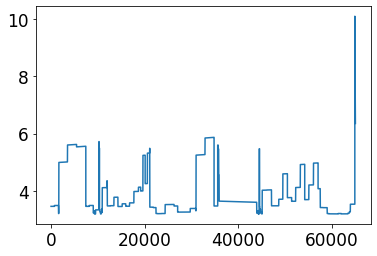

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import PchipInterpolator

x = gband_data['sun_alt'].to_list() + other_sky_data['-32.45500847074031'].to_list()
y = gband_data['huntsman_mag_g_sky'].to_list() + other_sky_data[' 19.915842441632975'].to_list()



poly = np.polyfit(x, y, deg=2)

plt.plot(np.polyval(poly, x), label='fit')

# # Generate points for the spline curve
# x_spline = np.linspace(min(x), max(x), 100)
# y_spline = spline(x_spline)

# # Plot the original data and the spline curve
# plt.scatter(x, y, label='Original Data')
# plt.plot(x_spline, y_spline, label='Cubic Spline', color='red')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()

    
    
# B_spline_coeff1 = PchipInterpolator(x, np.log(y))
# X1_Final = np.linspace(x.min(), x.max(), 1000)
# Y1_Final = np.exp(B_spline_coeff1(X1_Final))

# #plot subplots
# figure(figsize=(18, 6), dpi=80)
# plt.subplot(1, 2, 1) # row 1, col 2 index 1
# plt.plot(x, y,"ro")
# plt.plot(x, y)
# plt.title("Original")
# plt.xlabel('X')
# plt.ylabel('Percentile ')

# plt.subplot(1, 2, 2) # index 2
# plt.plot(x, y,"ro")
# plt.plot(X1_Final, Y1_Final,"green")
# plt.title("Spline Plot")
# plt.xlabel('X')
# plt.ylabel('Percentile ')

# plt.show()

# # # Generate some example data
# # gband_data.dropna    
# # x = gband_data['sun_alt'].to_list() + other_sky_data['-32.45500847074031'].to_list()
# # y = gband_data['huntsman_mag_g_sky'].to_list() + other_sky_data[' 19.915842441632975'].to_list()

# # sorted_pairs = sorted(zip(x, y))

# # # Unzip the sorted pairs to obtain the reordered lists
# # sorted_list1, sorted_list2 = zip(*sorted_pairs)


# # # Create a cubic spline interpolation
# # spline = CubicSpline(sorted_list1, sorted_list2)

# # # Generate points for the spline curve
# # x_spline = np.linspace(min(sorted_list1), max(sorted_list1), 100)
# # y_spline = spline(x_spline)

# # # Plot the original data and the spline curve
# # plt.scatter(x, y, label='Original Data')
# # plt.plot(x_spline, y_spline, label='Cubic Spline', color='red')
# # plt.xlabel('X')
# # plt.ylabel('Y')
# # plt.legend()
# # plt.show()

(3.0, -1.0)

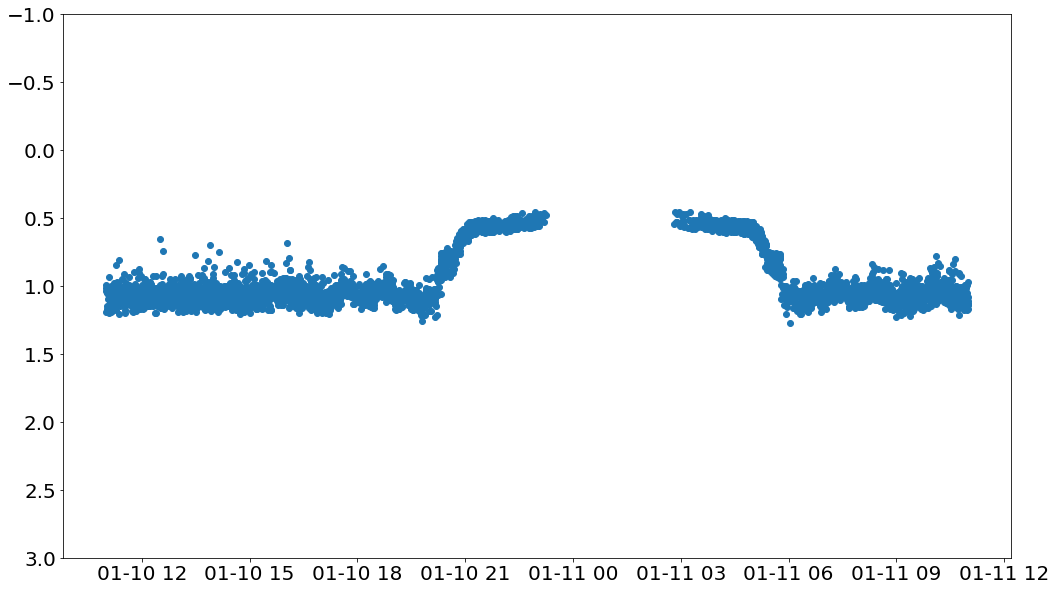

In [46]:
plt.figure(figsize = (17,10))

plt.scatter(y=(summer_observations_high['magnitude']+10)/(summer_observations_high['sky_background']+10),
           x=pd.to_datetime(summer_observations_high['times']) + timedelta(hours = 11))

plt.ylim(3,-1)

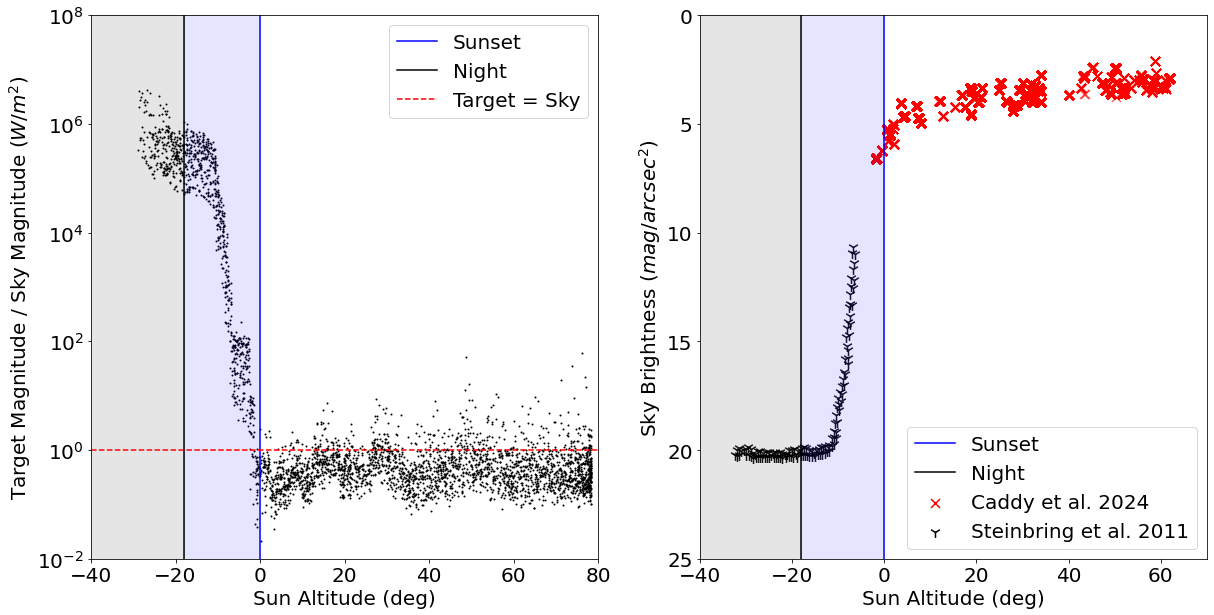

In [70]:
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size': 20})

plt.subplot(1, 2, 1)

ras_mag = 10**((summer_observations_high['magnitude'])/(-2.5))*3*10**8*3631*np.exp(-36)/600
sky_mag = 10**((summer_observations_high['sky_background'])/(-2.5))*3*10**8*3631*np.exp(-36)/600


plt.scatter(y=(ras_mag/sky_mag),
           x=summer_observations_high['sun_altitude'], s = 1, color = 'black')

# plt.scatter(y=winter_observations_high['magnitude']/winter_observations_high['sky_background'],
#            x=winter_observations_high['sun_altitude'], s = 1, color = 'black')

# plt.scatter(y=winter_observations_high['magnitude']/winter_observations_high['sky_background'],
#            x=winter_observations_high['sun_altitude'])


plt.axvspan(0, 
            -18, 
            alpha=0.1, color='blue')
plt.axvspan(-18, 
            -80, 
            alpha=0.1, color='black')

plt.axvline(0,c = 'blue', label = "Sunset")
plt.axvline(-18,c = 'black', label = "Night")
plt.axhline(1, color = 'red', ls = '--', label = "Target = Sky")
plt.yscale('log')
plt.legend()
plt.ylim(10**-2, 10**8)
plt.xlim(-40,80)
plt.xlabel("Sun Altitude (deg)")
plt.ylabel(r"Target Magnitude / Sky Magnitude $(W/m^2)$")




plt.subplot(1, 2, 2)

plt.scatter(gband_data['sun_alt'],
            gband_data['huntsman_mag_g_sky'], 
            label = "Caddy et al. 2024", 
            marker = 'x', 
            s = 80, 
            color = 'red', 
            alpha = 0.6)
plt.scatter(other_sky_data['-32.45500847074031'], 
            other_sky_data[' 19.915842441632975'], 
            label = "Steinbring et al. 2011", 
            marker = '1', 
            s = 120, 
            color = 'black', 
            alpha = 0.9)
plt.axvspan(0, 
            -18, 
            alpha=0.1, color='blue')
plt.axvspan(-18, 
            -80, 
            alpha=0.1, color='black')
plt.xlim(-40,70)
plt.ylim(25,0)
plt.axvline(0,c = 'blue', label = "Sunset")
plt.axvline(-18,c = 'black', label = "Night")
legend = plt.legend()
plt.xlabel("Sun Altitude (deg)")
plt.ylabel(r"Sky Brightness $(mag/arcsec^2)$")

# Get the legend handles (line objects)
legend_handles = legend.legendHandles

# Set the alpha for each legend handle
for handle in legend_handles:
    handle.set_alpha(1)  # Adjust the alpha value as needed

    
plt.savefig('/Users/physarah/Desktop/test123.png')

In [90]:
height_of_angel = np.arange(50,10000,1)
paralax_angle = (np.rad2deg(np.arctan(1/(height_of_angel)))*u.deg).to(u.arcsec).value/1.24

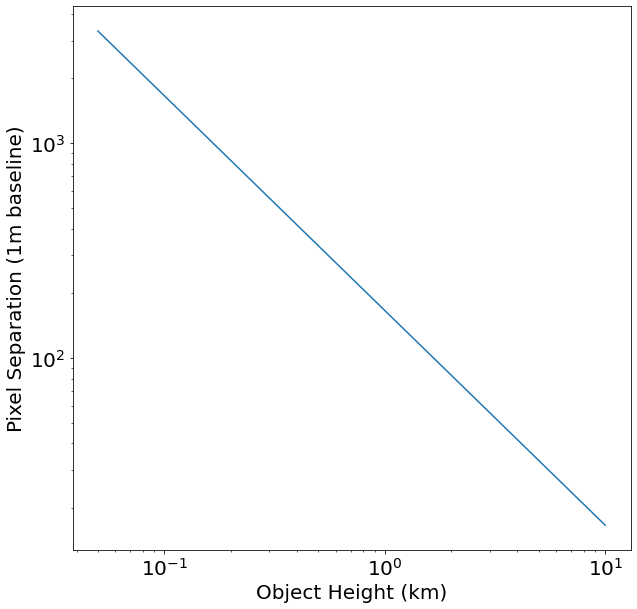

In [102]:
plt.figure(figsize = (10,10))
plt.plot(height_of_angel/1000,paralax_angle)
plt.xlabel("Object Height (km)")
plt.ylabel("Pixel Separation (1m baseline)")
plt.yscale('log')
plt.xscale('log')